In [17]:
import cv2
import numpy as np
import os

import matplotlib.pyplot as plt

## Data Preprocessing

In [2]:
img_path = '../data/cross_circles/raw/cropped/circle/b_c_1.jpg'

In [3]:
img = cv2.imread(img_path)
imgRsize = cv2.resize(img,(64,64), interpolation = cv2.INTER_AREA)
imgGray = cv2.cvtColor(imgRsize,cv2.COLOR_BGR2GRAY)

In [4]:
cv2.imshow('image', imgGray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [22]:
def preProcessImages(src_path, dst_path, new_size=(64,64), gray=True,canny=False):
    """
    process the image and saves the output
    :param src_path: dir path where src images are located
    :param dst_path: dir path for dst images
    :param new_size: size of the resized image
    :param gray: boolean which determines if output image should be grayscale
    """
    for file in os.listdir(src_path):
        
        img = cv2.imread(os.path.join(src_path, file))
        rgb_planes = cv2.split(img)
        
        result_planes = []
        result_norm_planes = []
        for plane in rgb_planes:
            dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
            bg_img = cv2.medianBlur(dilated_img, 21)
            diff_img = 255 - cv2.absdiff(plane, bg_img)
            norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
            result_planes.append(diff_img)
            result_norm_planes.append(norm_img)

        result = cv2.merge(result_planes)
        result_norm = cv2.merge(result_norm_planes)
        
        
        img = cv2.resize(result_norm,new_size, interpolation = cv2.INTER_AREA)
        
        if gray==True:
            img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
        if canny==True:
            img = cv2.GaussianBlur(img,(5,5),3)
            img = cv2.Canny(img,50,50)
        cv2.imwrite(os.path.join(dst_path, file),img)

In [9]:
# process all circles
src_path = '../data/cross_circles/raw/cropped/circle/'
dst_path = '../data/cross_circles/scaled/s64/circles/'
preProcessImages(src_path,dst_path)

In [10]:
# process all crosses
src_path = '../data/cross_circles/raw/cropped/cross/'
dst_path = '../data/cross_circles/scaled/s64/cross/'
preProcessImages(src_path,dst_path)

#### Canny

In [7]:
src_path = '../data/cross_circles/raw/cropped/circle/'
dst_path = '../data/cross_circles/scaled/sc64/circles/'
preProcessImages(src_path,dst_path,canny=True)

In [8]:
# process all crosses
src_path = '../data/cross_circles/raw/cropped/cross/'
dst_path = '../data/cross_circles/scaled/sc64/cross/'
preProcessImages(src_path,dst_path,canny=True)

#### Scale to128

In [13]:
# process all circles
src_path = '../data/cross_circles/raw/cropped/circle/'
dst_path = '../data/cross_circles/scaled/s256/circles/'
preProcessImages(src_path,dst_path,new_size=(256,256))

In [14]:
# process all crosses
src_path = '../data/cross_circles/raw/cropped/cross/'
dst_path = '../data/cross_circles/scaled/s256/cross/'
preProcessImages(src_path,dst_path,new_size=(256,256))

In [19]:
# process all circles
src_path = '../data/cross_circles/raw/cropped/circle/'
dst_path = '../data/cross_circles/scaled/s32/circles/'
preProcessImages(src_path,dst_path,new_size=(32,32))

In [20]:
# process all crosses
src_path = '../data/cross_circles/raw/cropped/cross/'
dst_path = '../data/cross_circles/scaled/s32/cross/'
preProcessImages(src_path,dst_path,new_size=(32,32))

In [23]:
# process all circles
src_path = '../data/cross_circles/raw/cropped/circle/'
dst_path = '../data/cross_circles/scaled/s32_1/circles/'
preProcessImages(src_path,dst_path,new_size=(32,32))

In [25]:
# process all crosses
src_path = '../data/cross_circles/raw/cropped/cross/'
dst_path = '../data/cross_circles/scaled/s32_1/cross/'
preProcessImages(src_path,dst_path,new_size=(32,32))

## Data Augmentation

In [15]:
import imgaug as ia
import imgaug.augmenters as iaa

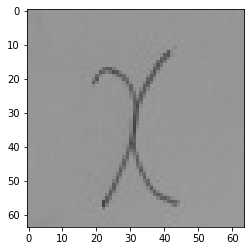

In [18]:
img_path = '../data/cross_circles/scaled/s64/cross/b_x_1.jpg'
img = cv2.imread(img_path)
plt.imshow(img,cmap='gray')

In [15]:
rotate = iaa.Affine(rotate=(-50, 30))
gaussian_noise = iaa.AdditiveGaussianNoise(10,20)
flip_hr = iaa.Fliplr(p=1.0)

In [16]:
rotated_img = rotate.augment_image(img)
noisy_img = gaussian_noise.augment_image(img)
flipped_img = flip_hr.augment_image(img)

In [17]:
cv2.imshow('image', rotated_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Dataset Preparation

In [ ]:
# Loading training dataset
ds_train = tf.keras.preprocessing.image_dataset_from_directory(
    '../data/cross_circles/scaled/s64/',
    labels = 'inferred',
    label_mode = "int",
    color_mode = 'grayscale',
    batch_size = 2,
    image_size = (64,64),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "training"
)

In [ ]:
# Loading validation dataset
ds_test = tf.keras.preprocessing.image_dataset_from_directory(
    '../data/cross_circles/scaled/s64/',
    labels = 'inferred',
    label_mode = "int",
    color_mode = 'grayscale',
    batch_size = 2,
    image_size = (64,64),
    shuffle = True,
    seed = 123,
    validation_split = 0.2,
    subset = "validation"
)

In [ ]:
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
    zoom_range = 0.1, # Randomly zoom image 
    width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
    dtype=tf.float32,
    validation_split=0.2
)

In [ ]:
train_gen = datagen.flow_from_directory(
    '../data/cross_circles/scaled/s64/',
    target_size=(64,64),
    batch_size=2,
    color_mode='grayscale',
    class_mode='sparse',
    shuffle=True,
    subset='training',
    seed=123
)

In [ ]:
test_gen = datagen.flow_from_directory(
    '../data/cross_circles/scaled/s64/',
    target_size=(64,64),
    batch_size=2,
    color_mode='grayscale',
    class_mode='sparse',
    shuffle=True,
    subset='validation',
    seed=123
)